📌 2. 클러스터링 (Clustering) 기법

🔹 K-Means 클러스터링
- 데이터를 K개의 군집으로 나눔 (각 데이터는 하나의 클러스터에만 속함)

- 군집 중심(centroid)을 기준으로 반복적으로 업데이트하여 최적의 군집을 찾음

- 계산 속도가 빠르지만, 클러스터가 원형으로 가정된다는 한계가 있음

🖥️ K-Means 코드 예제

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 2)

# K-Means 클러스터링 (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


🔹 GMM(Gaussian Mixture Model, 가우시안 혼합 모델)
- K-Means와 달리, 각 데이터가 여러 클러스터에 속할 확률을 가짐

- 클러스터를 가우시안 분포(정규 분포)의 조합으로 모델링

- K-Means보다 더 유연한 클러스터링 가능 (클러스터가 원형이 아니어도 잘 동작)

- 이상치 탐지(Anomaly Detection)에도 사용됨

🖥️ GMM 코드 예제

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 샘플 데이터 생성 (3개의 클러스터)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# GMM 모델 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# 클러스터 예측 (확률 기반)
labels = gmm.predict(X)

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("GMM을 이용한 클러스터링")
plt.legend()
plt.show()


📌 3. K-Means vs GMM 비교

비교 항목	K-Means	GMM
군집 형태	원형(구 형태)	다양한 모양 가능(타원형 등)
군집 결정 방식	거리 기반(Hard Clustering)	확률 기반(Soft Clustering)
이상치 탐지	어려움	확률을 기반으로 이상치 탐지 가능
계산 속도	빠름	상대적으로 느림

📌 4. 차원 축소 (Dimensionality Reduction) 기법

🔹 PCA(Principal Component Analysis, 주성분 분석)
- 데이터를 선형 변환하여 가장 중요한 축(주성분)을 찾아 차원을 축소

- 데이터의 정보 손실을 최소화하면서 차원 감소 가능

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 랜덤 데이터 (10개의 특징)
np.random.seed(42)
X = np.random.rand(200, 10)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (2개 주성분)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 결과")
plt.show()


🔹 LDA(Linear Discriminant Analysis, 선형 판별 분석)
- PCA와 유사하지만, 클래스 간 분류를 고려하여 차원을 축소

- 지도 학습(Supervised Learning) 성격을 가지므로, 라벨 정보가 필요

- 분류(Classification) 문제에서 차원 축소 후 성능 향상을 위해 사용됨

🖥️ LDA 코드 예제

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 샘플 데이터 생성 (2개의 클래스)
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)

# LDA 적용 (1개 축으로 차원 축소)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# 결과 시각화
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis', alpha=0.7)
plt.xlabel("LDA 축")
plt.title("LDA 차원 축소 결과")
plt.show()


🔹 t-SNE(t-Distributed Stochastic Neighbor Embedding)
- 비선형 차원 축소 기법 → 고차원 데이터를 2D 또는 3D로 시각화할 때 주로 사용

- PCA와 다르게, 데이터의 국소적인 구조(클러스터)를 보존

- 계산량이 많아 대용량 데이터에는 적합하지 않음

🖥️ t-SNE 코드 예제

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import seaborn as sns

# 손글씨 데이터 로드 (64차원)
digits = load_digits()
X, y = digits.data, digits.target

# t-SNE 적용 (2D 변환)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="viridis", alpha=0.7)
plt.xlabel("t-SNE 축 1")
plt.ylabel("t-SNE 축 2")
plt.title("t-SNE 차원 축소 결과")
plt.legend(title="숫자 클래스")
plt.show()


📌 5. 기법 비교 요약

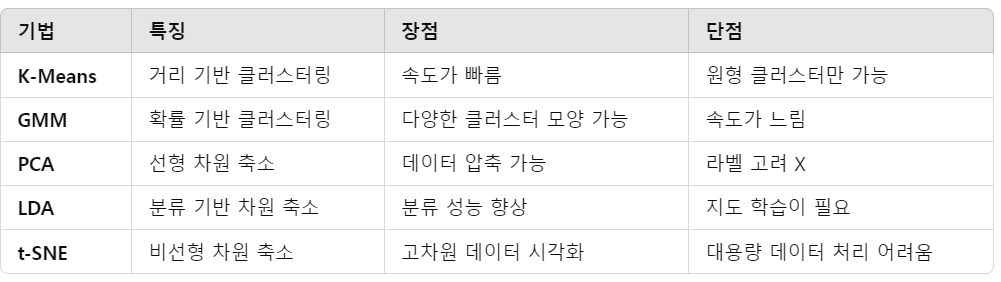

In [6]:
from IPython.display import Image
Image(r"C:\Users\dsy49\OneDrive\바탕 화면\새 폴더 (2)\스크린샷 2025-03-26 185808.png")

📌 6. 결론

- 클러스터링에는 K-Means(빠름) 과 GMM(더 유연함) 을 선택 가능

- 차원 축소에는 PCA(일반적인 축소) 와 t-SNE(시각화용) 을 활용

- 분류 기반 차원 축소는 LDA 가 가장 적절